# Project 2: Movie Classification


In [2]:

import numpy as np
import math
import datascience
from datascience import *


import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter("ignore")

import d8error

# Part 1: The Dataset

In [3]:
movies = Table.read_table('movies.csv')
movies

Title                      | Year | Rating | Genre    | # Words | she        | decid       | talk        | wit         | razor | slam | credit      | rai        | hugh | breez | conscienc   | audienc | cathi | log  | met         | chosen | grip        | booz        | bianca     | doubl | agent       | exit        | carpent | underground | clemenza | gain        | neg         | majesti | studio | chri        | spin        | greater     | eaten | vibrat | stupid      | cigarett    | jesu        | mani        | violin | financi     | bai         | cop         | neighbor    | cd   | england | made        | conni | instinct | took        | jacquelin | mace        | disappear  | waltz | behind      | bourbon | favorit     | benni       | manhattan | nixon | lunch       | principl    | tradit      | counterfeit | sophi | third       | exist       | wouldv      | hero        | theyr       | anytim      | christin | vallei | chess | paid        | burglar | nostril | rubber | human       | british     | plissken | eddi       | gee         | offend      | rebecca | anger       | plant     | famou      | repres      | latest | rent | dip         | bell | andi | so         | london | cooler      | keaton | portland | headlin     | whatta | fatal | sew  | cheer       | davi        | feed        | hudson | ambros | digest | redi | fri         | staff | casino      | occasion | shadow      | work        | restrain | face        | exercis | sidnei | pile | whyd        | teenag      | her         | retir       | hazard | roth | hurrican | impuls | ranger      | pour        | lester | slash | deer | could       | vital | qualiti | coma | incred      | hank        | famili      | duchess | global | virgin      | scientif | between     | holidai     | qualifi | moor | happili | arizona | non         | bruce       | ankl        | constant    | buzz | harder      | ing  | christian   | palmer | tent        | sunset      | damour | cohaagen | advertis | sensat | local       | there      | terri       | sedat | rotten | struck      | deck | past        | bro  | ann         | dump        | kane | slot        | immun | block       | lil  | technic     | tactic | pencil | outsid      | laboratori | easi        | nephew | coffin      | pretti      | coward | verbal      | permiss     | bartend     | wont        | watch       | lindenmey | cosmo      | capabl      | flirt | huge        | berkelei | max  | walter | lime | rico | marvin | aboard      | bacon | account | kirk | quaid | stunt | closet      | due         | nuclear | blind       | pussi       | howdi | snuff       | eas  | now        | leak        | underwear   | westlei | mayb        | theo | limo        | cousin      | illeg       | silli       | against     | done        | district | invad       | ryan | wait        | grudg | charact | hick | jami | lifetim | lecktor | and        | republican | life        | hidden      | wire        | paranoia | network     | messi | uthatu | effort      | carri       | windham | fun         | psychologist | sean | scent | answer      | mom         | wake        | sign        | ho   | relat       | jame | fat         | myself      | disrupt     | scan | vagu        | basket | christma | estim | em          | union | involv      | norman | suspici     | becom       | shoe        | librari     | administr | ford | complic | stuck       | justic      | attack      | releas | econom | hesit       | autopsi | jurisdict | four        | factor | inquiri | lion | meanwhil | prison      | blair | seri       | groceri | surgeri     | season | christi    | clean       | ow          | wrestl | en   | moral       | hungri      | cole | surfer | sixteen     | angl        | shame       | barrel | major       | ago         | lott | airplan | worth       | train       | easili | feller | valentin | harvei | wherev      | francisco   | true        | dramat | boston      | besid       | inspector | orlean | opportun    | nearli | lindsei | photograph | frame | at         | psy

In [4]:
movies.where("Title", "runaway bride").select(0, 1, 2, 3, 4, 14, 49, 1042, 4004)

Title,Year,Rating,Genre,# Words,breez,england,it,bravo
runaway bride,1999,5.2,comedy,4895,0,0,0.0234092,0


Additional context: This numerical representation of a body of text, one that describes only the frequencies of individual words, is called a bag-of-words representation. This is a model that is often used in [NLP](https://en.wikipedia.org/wiki/Natural_language_processing). A lot of information is discarded in this representation: the order of the words, the context of each word, who said what, the cast of characters and actors, etc. However, a bag-of-words representation is often used for machine learning applications as a reasonable starting point, because a great deal of information is also retained and expressed in a convenient and compact format. 

In this project, I will investigate whether this representation is sufficient to build an accurate genre classifier.

In [5]:
title_index = movies.index_by('Title')
def row_for_title(title):
    """Return the row for a title, similar to the following expression (but faster)
    
    movies.where('Title', title).row(0)
    """
    return title_index.get(title)[0]

row_for_title('toy story')

Row(Title='toy story', Year='1995', Rating=8.2, Genre='comedy', # Words=3016, she=0.0017427675148135, decid=0.0003485535029627, talk=0.0017427675148135, wit=0.0, razor=0.0, slam=0.0, credit=0.0, rai=0.0, hugh=0.0, breez=0.0, conscienc=0.0, audienc=0.0, cathi=0.0, log=0.0, met=0.0, chosen=0.0, grip=0.0, booz=0.0, bianca=0.0, doubl=0.0003485535029627, agent=0.0, exit=0.0, carpent=0.0, underground=0.0, clemenza=0.0, gain=0.0, neg=0.0006971070059254, majesti=0.0, studio=0.0, chri=0.0, spin=0.0, greater=0.0, eaten=0.0, vibrat=0.0, stupid=0.0010456605088881, cigarett=0.0, jesu=0.0, mani=0.0, violin=0.0, financi=0.0003485535029627, bai=0.0, cop=0.0, neighbor=0.0, cd=0.0, england=0.0, made=0.0003485535029627, conni=0.0, instinct=0.0, took=0.0, jacquelin=0.0, mace=0.0, disappear=0.0, waltz=0.0, behind=0.0003485535029627, bourbon=0.0, favorit=0.0006971070059254, benni=0.0, manhattan=0.0, nixon=0.0, lunch=0.0, principl=0.0, tradit=0.0, counterfeit=0.0, sophi=0.0, third=0.0, exist=0.0, wouldv=0.00

In [6]:
row_for_title('toy story').item('fun') 

0.0003485535029627

In [7]:

expected_row_sum = 1

This dataset was extracted from [a dataset from Cornell University](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html). After transforming the dataset (e.g., converting the words to lowercase, removing the naughty words, and converting the counts to frequencies), new dataset containing the frequency of 5000 common words in each movie was created.

In [9]:
print('Words with frequencies:', movies.drop(np.arange(5)).num_columns) 
print('Movies with genres:', movies.num_rows)

Words with frequencies: 5000
Movies with genres: 333


## 1.1. Word Stemming
The columns other than "Title", "Year", "Rating", "Genre", and "# Words" in the `movies` table are all words that appear in some of the movies in our dataset.  These words have been *stemmed*, or abbreviated heuristically, in an attempt to make different [inflected](https://en.wikipedia.org/wiki/Inflection) forms of the same base word into the same string.  For example, the column "manag" is the sum of proportions of the words "manage", "manager", "managed", and "managerial" (and perhaps others) in each movie. This is a common technique used in machine learning and natural language processing.


In [10]:
vocab_mapping = Table.read_table('stem.csv')
stemmed = np.take(movies.labels, np.arange(3, len(movies.labels)))
vocab_table = Table().with_column('Stem', stemmed).join('Stem', vocab_mapping)
vocab_table.take(np.arange(1100, 1110))

Stem,Word
bond,bonding
bone,bone
bone,boning
bone,bones
bonu,bonus
book,bookings
book,books
book,booking
book,booked
book,book


In [11]:
stemmed_message = vocab_table.where('Word','elements').column(0).item(0)
stemmed_message

'element'

In [13]:
most_stem = vocab_table.group('Stem').sort('count',descending = True).column(0).item(0)
most_stem

'gener'

Longest word in the dataset whose stem wasn't shortened =`longest_uncut`. 
Ties broken alphabetically from Z to A. 


<!--
BEGIN QUESTION
name: q1_1_3
points:
 - 0
 - 3
-->

In [15]:
tbl_with_lens = vocab_table.with_columns('lens_Stem', vocab_table.apply(len, 'Stem'),
                                         'lens_Word', vocab_table.apply(len, 'Word'))
                                        
tbl_with_diff = tbl_with_lens.with_columns('diff', tbl_with_lens.column('lens_Word') - tbl_with_lens.column('lens_Stem')).where('diff',0)

longest_uncut = str(max(make_array(tbl_with_diff.sort('lens_Word',descending = True).column('Word').item(0), 
                               tbl_with_diff.sort('lens_Word',descending = True).column('Word').item(1))))
longest_uncut

'misunderstand'

In [17]:
count_single_stems = vocab_table.group('Stem').where('count',1).num_rows
count_single_stems

1408

## 1.2. Exploratory Data Analysis: Linear Regression

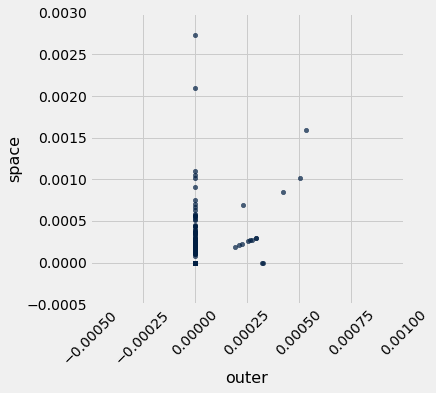

In [19]:
outer_space = movies.select("outer", "space")
outer_space.scatter("outer", "space")
plots.axis([-0.0005, 0.001, -0.0005, 0.003]);
plots.xticks(rotation=45);

In [20]:
# These two arrays should make your code cleaner!
outer = movies.column("outer")
space = movies.column("space")

outer_su = (outer-np.mean(outer)) / np.std(outer)
space_su = (space-np.mean(space)) / np.std(space)

outer_space_r = np.mean(outer_su*space_su)
outer_space_r

0.3194260787689591

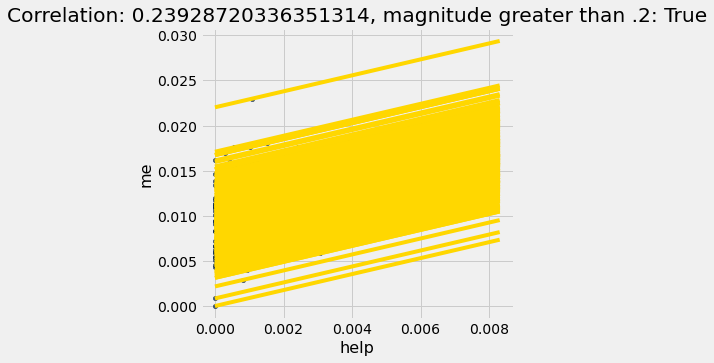

In [22]:
word_x = 'help'
word_y = 'me'

arr_x = movies.column(word_x)
arr_y = movies.column(word_y)

x_su = (arr_x - np.mean(arr_x))/np.std(arr_x)
y_su = (arr_y - np.mean(arr_y))/np.std(arr_y)

r = abs(np.mean(x_su * y_su))

slope = r* (np.std(arr_y)/np.std(arr_x))
intercept = arr_y - slope * arr_x

movies.scatter(word_x, word_y)
max_x = max(movies.column(word_x))
plots.title(f"Correlation: {r}, magnitude greater than .2: {abs(r) >= 0.2}")
plots.plot([0, max_x * 1.3], [intercept, intercept + slope * (max_x*1.3)], color='gold');

## 1.3. Splitting the dataset
Purpose of `movies` dataset:

1. *train* movie genre classifiers.
2. *test* the performance of our classifiers. 

The purpose of a classifier is to classify unseen data that is similar to the training data. The test dataset will help us determine the accuracy of our predictions by comparing the actual genres of the movies with the genres that our classifier predicts. Therefore, we must ensure that there are no movies that appear in both sets. We do so by splitting the dataset randomly. The dataset has already been permuted randomly, so it's easy to split.  I just took the first 85% of the dataset for training and the rest for test. 


In [25]:

training_proportion = 17/20

num_movies = movies.num_rows
num_train = int(num_movies * training_proportion)
num_test = num_movies - num_train

train_movies = movies.take(np.arange(num_train))
test_movies = movies.take(np.arange(num_train, num_movies))

print("Training: ",   train_movies.num_rows, ";",
      "Test: ",       test_movies.num_rows)

Training:  283 ; Test:  50


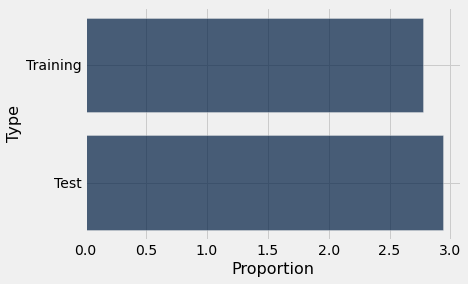

In [26]:
def comedy_proportion(table):
    
    return table.num_rows / table.where('Genre','comedy').num_rows

tbl = Table().with_columns(
                    'Type', make_array('Training','Test'),
                    'Proportion', make_array(comedy_proportion(train_movies),comedy_proportion(test_movies))
)
tbl.barh('Type','Proportion')

<!-- END QUESTION -->



# Part 2: K-Nearest Neighbors - A Guided Example

[K-Nearest Neighbors (k-NN)] is a classification algorithm.  Given some numerical *attributes* (also called *features*) of an unseen example, it decides which category that example belongs to based on its similarity to previously seen examples. Predicting the category of an example is called *labeling*, and the predicted category is also called a *label*.

An attribute (feature) we have about each movie is *the proportion of times a particular word appears in the movie*, and the labels are two movie genres: comedy and thriller.  The algorithm requires many previously seen examples for which both the attributes and labels are known: that's the `train_movies` table.

## 2.1. Classifying a movie

In k-NN, we classify a movie by finding the `k` movies in the *training set* that are most similar according to the features we choose. We call those movies with similar features the *nearest neighbors*.  The k-NN algorithm assigns the movie to the most common category among its `k` nearest neighbors.


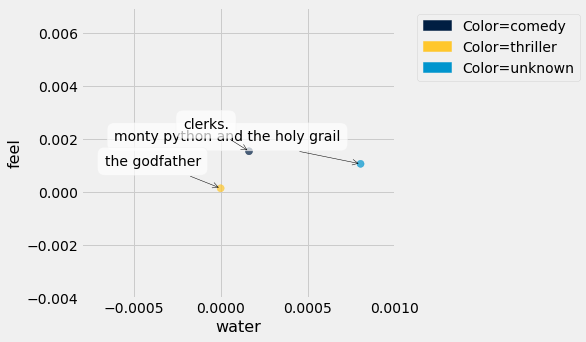

In [27]:

def plot_with_two_features(test_movie, training_movies, x_feature, y_feature):
    """Plot a test movie and training movies using two features."""
    test_row = row_for_title(test_movie)
    distances = Table().with_columns(
            x_feature, [test_row.item(x_feature)],
            y_feature, [test_row.item(y_feature)],
            'Color',   ['unknown'],
            'Title',   [test_movie]
        )
    for movie in training_movies:
        row = row_for_title(movie)
        distances.append([row.item(x_feature), row.item(y_feature), row.item('Genre'), movie])
    distances.scatter(x_feature, y_feature, group='Color', labels='Title', s=50)
    
training = ["clerks.", "the godfather"] 
plot_with_two_features("monty python and the holy grail", training, "water", "feel")
plots.axis([-0.0008, 0.001, -0.004, 0.007]);

In [28]:
python = row_for_title("monty python and the holy grail") 
godfather = row_for_title("the godfather") 

one_distance = np.sqrt((python.item('water')- godfather.item('water'))**2 + (python.item('feel')- godfather.item('feel'))**2)
one_distance

0.0012225209151294461

Below, we've added a third training movie, *The Silence of the Lambs*. Before, the point closest to *Monty Python and the Holy Grail* was *Clerks.*, a comedy movie. However, now the closest point is *The Silence of the Lambs*, a thriller movie.

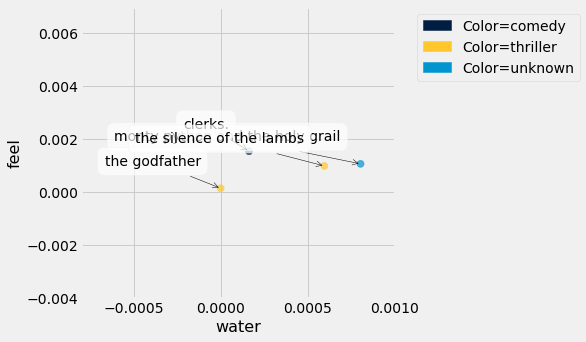

In [30]:
training = ["clerks.", "the godfather", "the silence of the lambs"] 
plot_with_two_features("monty python and the holy grail", training, "water", "feel") 
plots.axis([-0.0008, 0.001, -0.004, 0.007]);

In [31]:
def distance_two_features(title0, title1, x_feature, y_feature):
    """Compute the distance between two movies with titles title0 and title1.
    
    Only the features named x_feature and y_feature are used when computing the distance.
    """
    row0 = row_for_title(title0)
    row1 = row_for_title(title1)
    return np.sqrt((row0.item(x_feature)- row1.item(x_feature))**2 + (row0.item(y_feature)- row1.item(y_feature))**2)

for movie in make_array("clerks.", "the silence of the lambs"):
    movie_distance = distance_two_features(movie, "monty python and the holy grail", "water", "feel")
    print(movie, 'distance:\t', movie_distance)

clerks. distance:	 0.0007983810687227716
the silence of the lambs distance:	 0.00022256314855564847


In [33]:
def distance_from_python(title):
    """Return the distance between the given movie and "monty python and the holy grail", 
    based on the features "water" and "feel".
    
    This function takes a single argument:
      title: A string, the name of a movie.
    """
    return distance_two_features('monty python and the holy grail', title, 'water', 'feel')
    
# Calculate the distance between "Clerks." and "Monty Python and the Holy Grail"
distance_from_python('clerks.')

0.0007983810687227716

In [35]:

distance = make_array()
movie_titles = train_movies.column('Title')

for movie in movie_titles:
    distance = np.append(distance,distance_from_python(movie))
    
close_movies = Table().with_columns('Title', train_movies.column('Title'),
                                    'Genre', train_movies.column('Genre'),
                                    'water', train_movies.column('water'),
                                    'feel', train_movies.column('feel'),
                                    'distance from python', distance).sort('distance from python')
fifth = close_movies.column('distance from python').item(4)
close_movies = close_movies.where('distance from python', are.below_or_equal_to(fifth))
close_movies

Title,Genre,water,feel,distance from python
alien,thriller,0.00070922,0.00124113,0.000193831
tomorrow never dies,thriller,0.000888889,0.000888889,0.00020189
the silence of the lambs,thriller,0.000595948,0.000993246,0.000222563
innerspace,comedy,0.000522193,0.00104439,0.00028324
some like it hot,comedy,0.000528541,0.000951374,0.00030082


In [37]:
def most_common(label, table):
    """This function takes two arguments:
      label: The label of a column, a string.
      table: A table.
     
    It returns the most common value in the label column of the table.
    In case of a tie, it returns any one of the most common values.    
    """
    tbl = table.group(label)
    tbl_order = tbl.sort('count',descending = True).column('Genre').item(0)
    return tbl_order

   

    

# Calling most_common on your table of 5 nearest neighbors classifies
# "monty python and the holy grail" as a thriller movie, 3 votes to 2. 
most_common('Genre', close_movies)

'thriller'

---

# Part 3: Features


Extending our classifier to consider more than two features at a time to see if we can get a better classification of our movies.

Euclidean distance still makes sense with more than two features. For `n` different features, we compute the difference between corresponding feature values for two movies, square each of the `n`  differences, sum up the resulting numbers, and take the square root of the sum.

In [40]:
def distance(features_array1, features_array2):
    """The Euclidean distance between two arrays of feature values."""
    array1 = np.array(features_array1)
    array2 = np.array(features_array2)
    return np.sqrt(np.sum((array1-array2)**2))


train_dist = train_movies.drop(np.arange(5))

distance_first_to_second = distance(train_dist.row(0), train_dist.row(1))
distance_first_to_second

0.03335446890881317

## 3.1. Creating another test feature set


In [52]:
my_features = make_array('help','ghost','kill','hopeless','drain','holli','terror','cigarett','cool','gum')

train_my_features = train_movies.select(my_features)
test_my_features = test_movies.select(my_features)

In [54]:
print("Movie:")
test_movies.take(0).select('Title', 'Genre').show()
print("Features:")
test_my_features.take(0).show()

Movie:


Title,Genre
ghostbusters ii,comedy


Features:


help,ghost,kill,hopeless,drain,holli,terror,cigarett,cool,gum
0.00098912,0.00049456,0.000329707,0,0,0,0,0,0.000164853,0.000164853


In [55]:

def fast_distances(test_row, train_table):
    """Return an array of the distances between test_row and each row in train_table.

    Takes 2 arguments:
      test_row: A row of a table containing features of one
        test movie (e.g., test_my_features.row(0)).
      train_table: A table of features (for example, the whole
        table train_my_features)."""
    assert train_table.num_columns < 50, "Make sure you're not using all the features of the movies table."
    assert type(test_row) != datascience.tables.Table, "Make sure you are passing in a row object to fast_distances."
    assert len(test_row) == len(train_table.row(0)), "Make sure the length of test row is the same as the length of a row in train_table."
    counts_matrix = np.asmatrix(train_table.columns).transpose()
    diff = np.tile(np.array(list(test_row)), [counts_matrix.shape[0], 1]) - counts_matrix
    np.random.seed(0) # For tie breaking purposes
    distances = np.squeeze(np.asarray(np.sqrt(np.square(diff).sum(1))))
    eps = np.random.uniform(size=distances.shape)*1e-10 #Noise for tie break
    distances = distances + eps
    return distances

In [56]:


train_selected = train_movies.select(my_features)

test_row = test_movies.select(my_features).row(0)
distances = fast_distances(test_row, train_selected)
genre_and_distances = Table().with_columns('Genre', train_movies.column('Genre'),
                                           'Distance', distances
                                          ).sort('Distance')
genre_and_distances

Genre,Distance
thriller,0.00038199
thriller,0.000544347
comedy,0.000554042
comedy,0.000554675
comedy,0.000557296
thriller,0.000561649
comedy,0.000561996
thriller,0.000563067
comedy,0.00057013
thriller,0.000570791


In [58]:

my_assigned_genre = genre_and_distances.take(np.arange(6)).group('Genre').sort('count',descending = True).column('Genre').item(0)
print(my_assigned_genre)

my_assigned_genre_was_correct = True
print("The assigned genre, {}, was{}correct.".format(my_assigned_genre, " " if my_assigned_genre_was_correct else " not "))

comedy
The assigned genre, comedy, was correct.


## 3.2. A classifier function


In [60]:
def classify(test_row, train_features, train_labels, k):
    """Return the most common class among k nearest neigbors to test_row."""
    distances = fast_distances(test_row, train_features)
    genre_and_distances =  Table().with_columns('Genre', train_labels,
                                           'Distance', distances
                                          ).sort('Distance')
    assigned = genre_and_distances.take(np.arange(k)).group('Genre').sort('count',descending = True).column('Genre').item(0)
    return assigned

In [62]:

godzilla_features = test_movies.where('Title','godzilla').select(my_features).row(0)

train_selected = train_movies.select(my_features)
godzilla_genre = classify(godzilla_features,train_selected, train_movies.column('Genre'), 15)

godzilla_genre

'thriller'

In [64]:
def classify_feature_row(row):
    return classify(row, train_selected, train_movies.column('Genre'),15)

# When you're done, this should produce 'thriller' or 'comedy'.
classify_feature_row(test_my_features.row(0))

'comedy'

## 3.3. Evaluating your classifier

In [66]:
test_guesses = test_movies.select(my_features).apply(classify_feature_row)
proportion_correct = np.count_nonzero(test_guesses == test_movies.column('Genre')) / test_movies.num_rows
proportion_correct

0.72

In [68]:
# Feel free to use multiple lines of code
# but make sure to assign test_movie_correctness to the proper table!

test_movie_correctness = Table().with_columns('Title', test_movies.column('Title'),
                                              'Genre', test_movies.column('Genre'),
                                              'Was correct', test_guesses == test_movies.column('Genre')
                                             )
test_movie_correctness.sort('Was correct', descending = True).show(5)

Title,Genre,Was correct
ghostbusters ii,comedy,True
intolerable cruelty,comedy,True
book of shadows: blair witch 2,thriller,True
the getaway,thriller,True
broadcast news,comedy,True


# Part 4: Building another classifier to evaluate

In [70]:
friend_movies = Table.read_table('friend_movies.csv')
friend_movies.show(5)

In [71]:
new_features = make_array('help','ghost','kill','cool','gum')

train_new = train_movies.select(new_features)
test_new = friend_movies.select(new_features)

def another_classify(test_row, train_features, train_labels, k):
    """Return the most common class among k nearest neigbors to test_row."""
    distances = fast_distances(test_row, train_features)
    genre_and_distances =  Table().with_columns('Genre', train_labels,
                                           'Distance', distances).sort('Distance')
    assigned = genre_and_distances.take(np.arange(k)).group('Genre').sort('count',descending = True).column('Genre').item(0)
    return assigned

def another_classifier(row):
    return another_classify(row, train_new, train_movies.column('Genre'),20)

test_new_features = test_my_features.select(new_features)

another_classifier(test_new_features.row(0))

new_test_guesses = test_new.apply(another_classifier)
new_proportion_correct = np.count_nonzero(new_test_guesses == friend_movies.column('Genre')) / test_new.num_rows


new_movie_correctness = Table().with_columns('Title', friend_movies.column('Title'),
                                            'Genre', friend_movies.column('Genre'),
                                            'Was correct', new_test_guesses == friend_movies.column('Genre')
                                             )
new_movie_correctness.sort('Was correct', descending = True)

new_proportion_correct

0.7027027027027027